<a href="https://colab.research.google.com/github/rohanath123/Forms-Dataset-Creation/blob/master/distributed_writing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
import torchvision
import torchvision.transforms as transforms
import torchvision.datasets as dsets

In [0]:
import matplotlib
import matplotlib.pyplot as plt
import random

In [0]:
pil = transforms.ToPILImage()
tens = transforms.ToTensor()

In [0]:
from google.colab import files
upload = files.upload()

Saving e01-107.zip to e01-107.zip


In [0]:
from zipfile import ZipFile

In [0]:
with ZipFile('/content/e01-107.zip', 'r') as f:
  f.extractall()

In [0]:
images = dsets.ImageFolder('/content/', transform = transforms.ToTensor(),)

In [0]:
images = [images[i][0] for i in range(len(images))]

In [0]:
def is_collide(img, blank_img, x, y):
  if torch.all(torch.eq(blank_img[0][x:x+img.size()[1], y:y+img.size()[2]], torch.ones(1, img.size()[1], img.size()[2]))):
    return False
  else:
    print("Collision!")
    return True 

In [0]:
def stitch_images(imgs, max_size):
  blank_img = torch.ones((3, max_size, max_size))
  for img in imgs:
    while True:
      x = random.randint(1, max_size-img.size()[1])
      y = random.randint(1, max_size-img.size()[2])
      if is_collide(img, blank_img, x, y) == False:
        for i in range(3):
          blank_img[i][x:x+img.size()[1], y:y+img.size()[2]] = img[i]
        break
  return blank_img

In [0]:
def make_forms(imgs, size):
  forms = []
  max_size = round(max([imgs[i].size()[2] for i in range(len(imgs))]) + 200, -3)
  for i in range(size):
    no_sentences = random.randint(1, 2)
    sentences = random.sample(imgs, no_sentences)
    
    forms.append(stitch_images(sentences, max_size))
  return forms

In [0]:
def save_forms_set(forms, PATH):
  for i in range(len(forms)):
    pil(forms[i]).save(PATH+str(i)+'.png')

In [0]:
forms = make_forms(images, len(images))

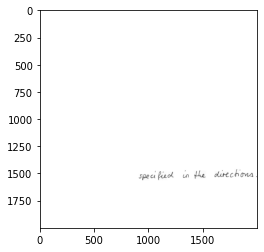

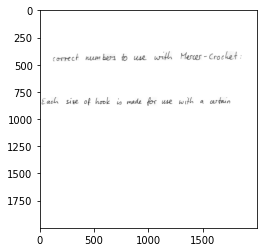

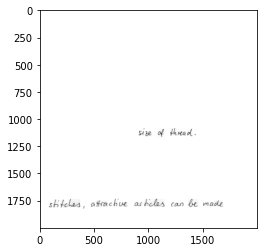

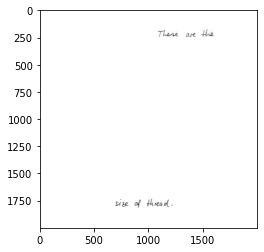

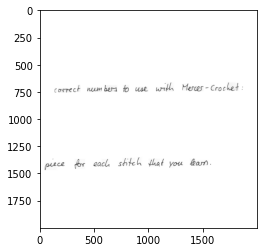

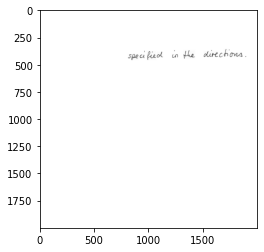

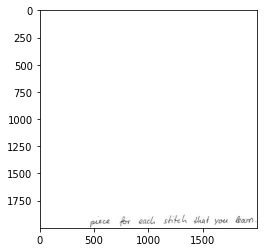

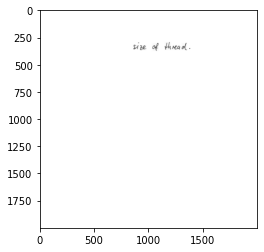

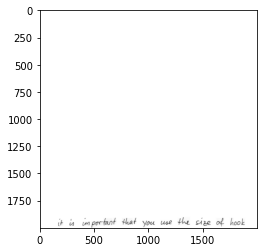

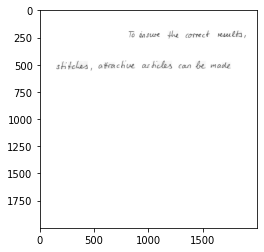

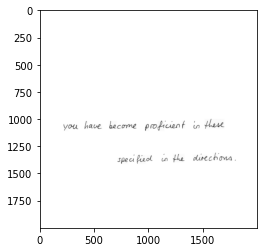

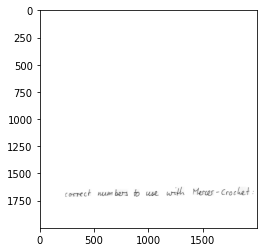

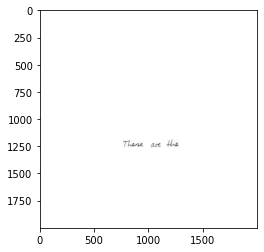

In [0]:
for form in forms:
  plt.imshow(pil(form))
  plt.show()